In [2]:
# Install required packages
!pip install stable-baselines3[extra] gym matplotlib plotly

!pip install "shimmy>=2.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [3]:
import json
import random
import os

def generate_jssp_instance(num_jobs, num_machines, filename):
    instance = []
    for _ in range(num_jobs):
        tasks = []
        machines = random.sample(range(num_machines), num_machines)
        for m in machines:
            duration = random.randint(1, 10)
            tasks.append([m, duration])
        instance.append(tasks)
    with open(filename, "w") as f:
        json.dump(instance, f)

# Create instance folder
os.makedirs("instances", exist_ok=True)

# Generate instances
generate_jssp_instance(10, 5, "instances/jssp_10x5.json")
generate_jssp_instance(20, 10, "instances/jssp_20x10.json")
generate_jssp_instance(50, 15, "instances/jssp_50x15.json")
generate_jssp_instance(100, 20, "instances/jssp_100x20.json")
generate_jssp_instance(5, 2, "instances/jssp_5x2.json")

print("Instances generated in /content/instances/")

Instances generated in /content/instances/


In [4]:
from jobshop_env_new import JobShopEnv
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.3     |
|    ep_rew_mean     | -53.1    |
| time/              |          |
|    fps             | 754      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19.9        |
|    ep_rew_mean          | -54.5       |
| time/                   |             |
|    fps                  | 555         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006626318 |
|    clip_fraction        | 0.032       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.0215      |
|    learning_rate        | 0.

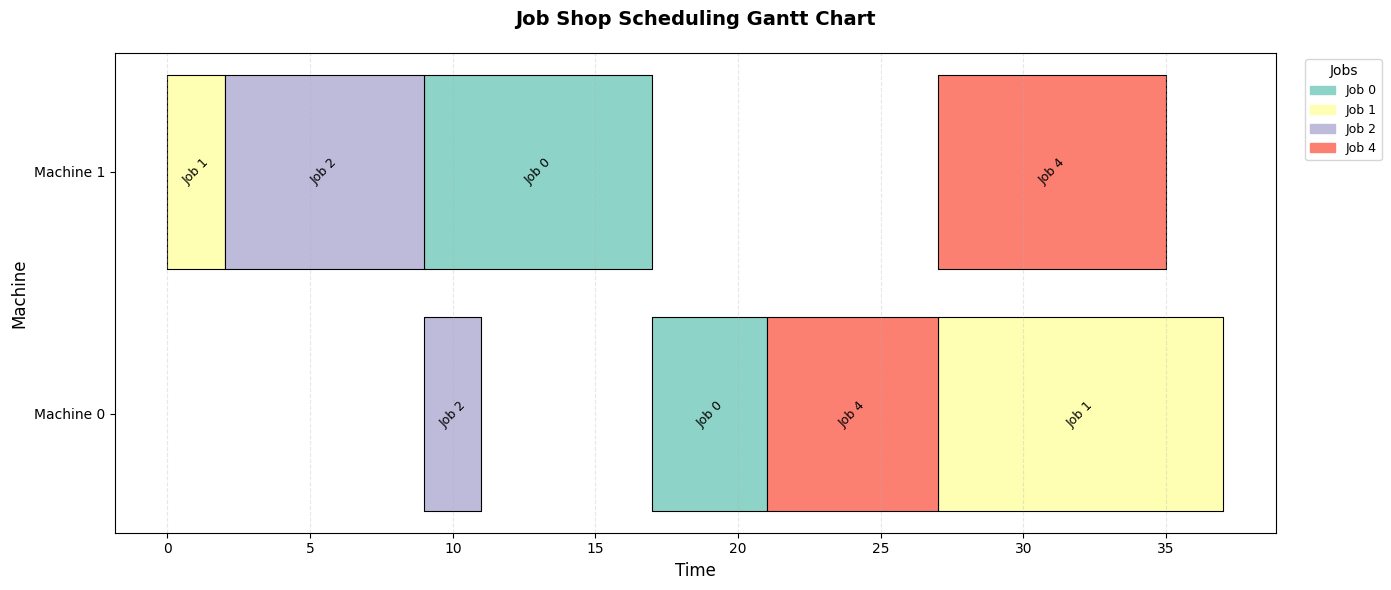

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv
import pandas as pd

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create the environment
    env = JobShopEnv(env_config)

    # Train the model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    print(f"Model saved at: {model_path}")

    # Print job schedule content
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    # Prepare data for visualization
    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    # Convert job schedule to DataFrame for plotting
    df = pd.DataFrame(job_schedule)

    # Sort machines and assign numeric y positions
    machine_order = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    machine_ypos = {machine: i * 10 for i, machine in enumerate(machine_order)}

    # Use a nicer color palette
    palette = sns.color_palette("Set3", n_colors=len(df['Job'].unique()))
    job_colors = {job: palette[i] for i, job in enumerate(df['Job'].unique())}

    # Create the Gantt chart plot
    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        machine = row['Machine']
        job = row['Job']
        ypos = machine_ypos[machine]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=job_colors[job],
            edgecolors='black',
            linewidth=0.8
        )

        # Add vertical text label inside bar (rotation 45 degrees)
        ax.text(
            start + duration / 2,
            ypos + 4,
            job,
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    # Format axes
    ax.set_yticks([y + 4 for y in machine_ypos.values()])
    ax.set_yticklabels(machine_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Machine", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)

    # Add light grid
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    # Add legend
    handles = [mpatches.Patch(color=color, label=job) for job, color in job_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Jobs", fontsize=9, title_fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
train_and_visualize_jssp("ppo_jssp_5x2", "instances/jssp_5x2.json")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89.9     |
|    ep_rew_mean     | -176     |
| time/              |          |
|    fps             | 753      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 93.7        |
|    ep_rew_mean          | -183        |
| time/                   |             |
|    fps                  | 537         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008232156 |
|    clip_fraction        | 0.0352      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.3        |
|    explained_variance   | -0.000811   |
|    learning_rate        | 0.

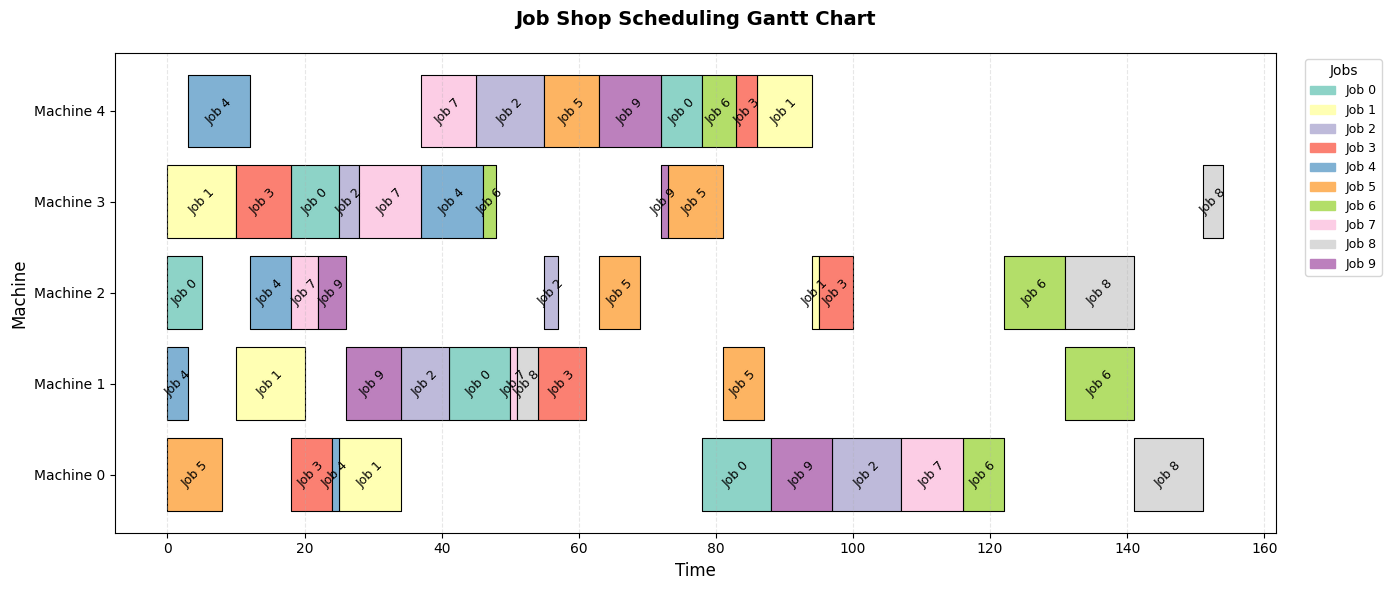

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create the environment
    env = JobShopEnv(env_config)

    # Train the model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    print(f"Model saved at: {model_path}")

    # Print job schedule content
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    # Calculate the makespan
    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    # Prepare data for visualization
    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    # Convert job schedule to DataFrame for plotting
    df = pd.DataFrame(job_schedule)

    # Sort machines and assign numeric y positions
    machine_order = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    machine_ypos = {machine: i * 10 for i, machine in enumerate(machine_order)}

    # Use a nicer color palette
    palette = sns.color_palette("Set3", n_colors=len(df['Job'].unique()))
    job_colors = {job: palette[i] for i, job in enumerate(df['Job'].unique())}

    # Create the Gantt chart plot
    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        machine = row['Machine']
        job = row['Job']
        ypos = machine_ypos[machine]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=job_colors[job],
            edgecolors='black',
            linewidth=0.8
        )

        # Add vertical text label inside bar (rotation 45 degrees)
        ax.text(
            start + duration / 2,
            ypos + 4,
            job,
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    # Format axes
    ax.set_yticks([y + 4 for y in machine_ypos.values()])
    ax.set_yticklabels(machine_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Machine", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)

    # Add light grid
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    # Add legend
    handles = [mpatches.Patch(color=color, label=job) for job, color in job_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Jobs", fontsize=9, title_fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

train_and_visualize_jssp("ppo_jssp_10x5", "instances/jssp_10x5.json")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 348      |
|    ep_rew_mean     | -401     |
| time/              |          |
|    fps             | 755      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 338         |
|    ep_rew_mean          | -400        |
| time/                   |             |
|    fps                  | 593         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011504445 |
|    clip_fraction        | 0.113       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.99       |
|    explained_variance   | -0.000941   |
|    learning_rate        | 0.

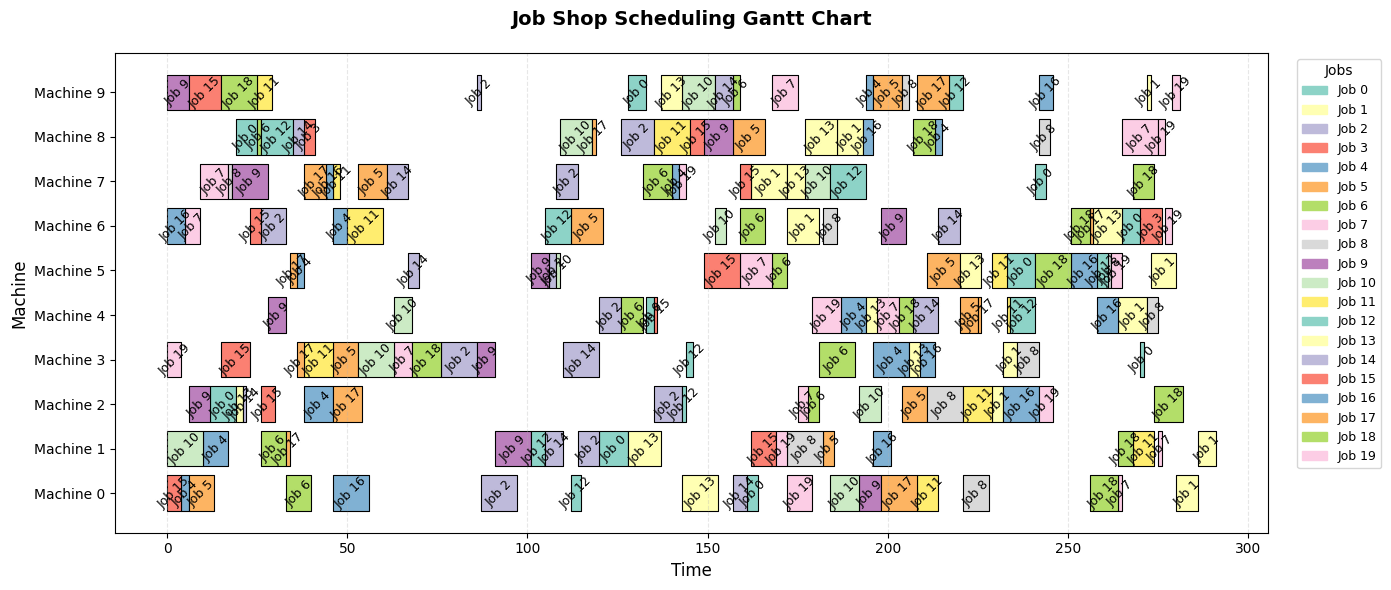

In [ ]:
train_and_visualize_jssp("ppo_jssp_20x10", "instances/jssp_20x10.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.79e+03  |
|    ep_rew_mean     | -1.65e+03 |
| time/              |           |
|    fps             | 742       |
|    iterations      | 1         |
|    time_elapsed    | 2         |
|    total_timesteps | 2048      |
----------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.48e+03    |
|    ep_rew_mean          | -1.33e+03   |
| time/                   |             |
|    fps                  | 547         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014344282 |
|    clip_fraction        | 0.138       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.9        |
|    explained_variance   | 0.00204     |
|    learning_rate  

<ipython-input-7-7f1ee2720a13>:96: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


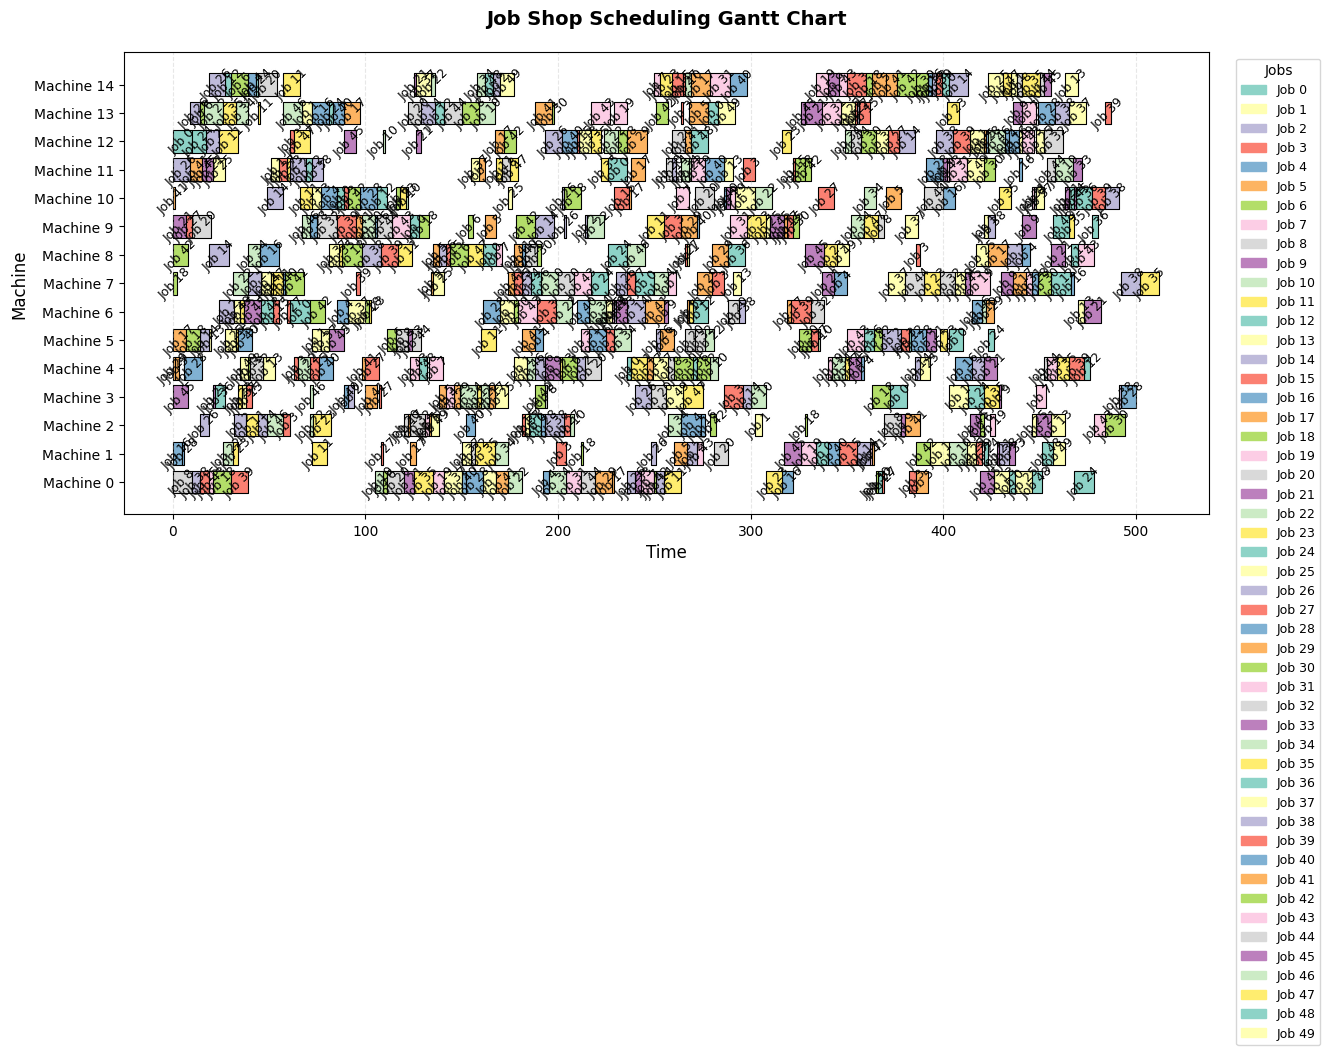

In [ ]:
train_and_visualize_jssp("ppo_jssp_50x15", "instances/jssp_50x15.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 727  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.52e+03    |
|    ep_rew_mean          | -2.58e+03   |
| time/                   |             |
|    fps                  | 539         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014126826 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_variance   | 0.057       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.801       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.025

<ipython-input-7-7f1ee2720a13>:96: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


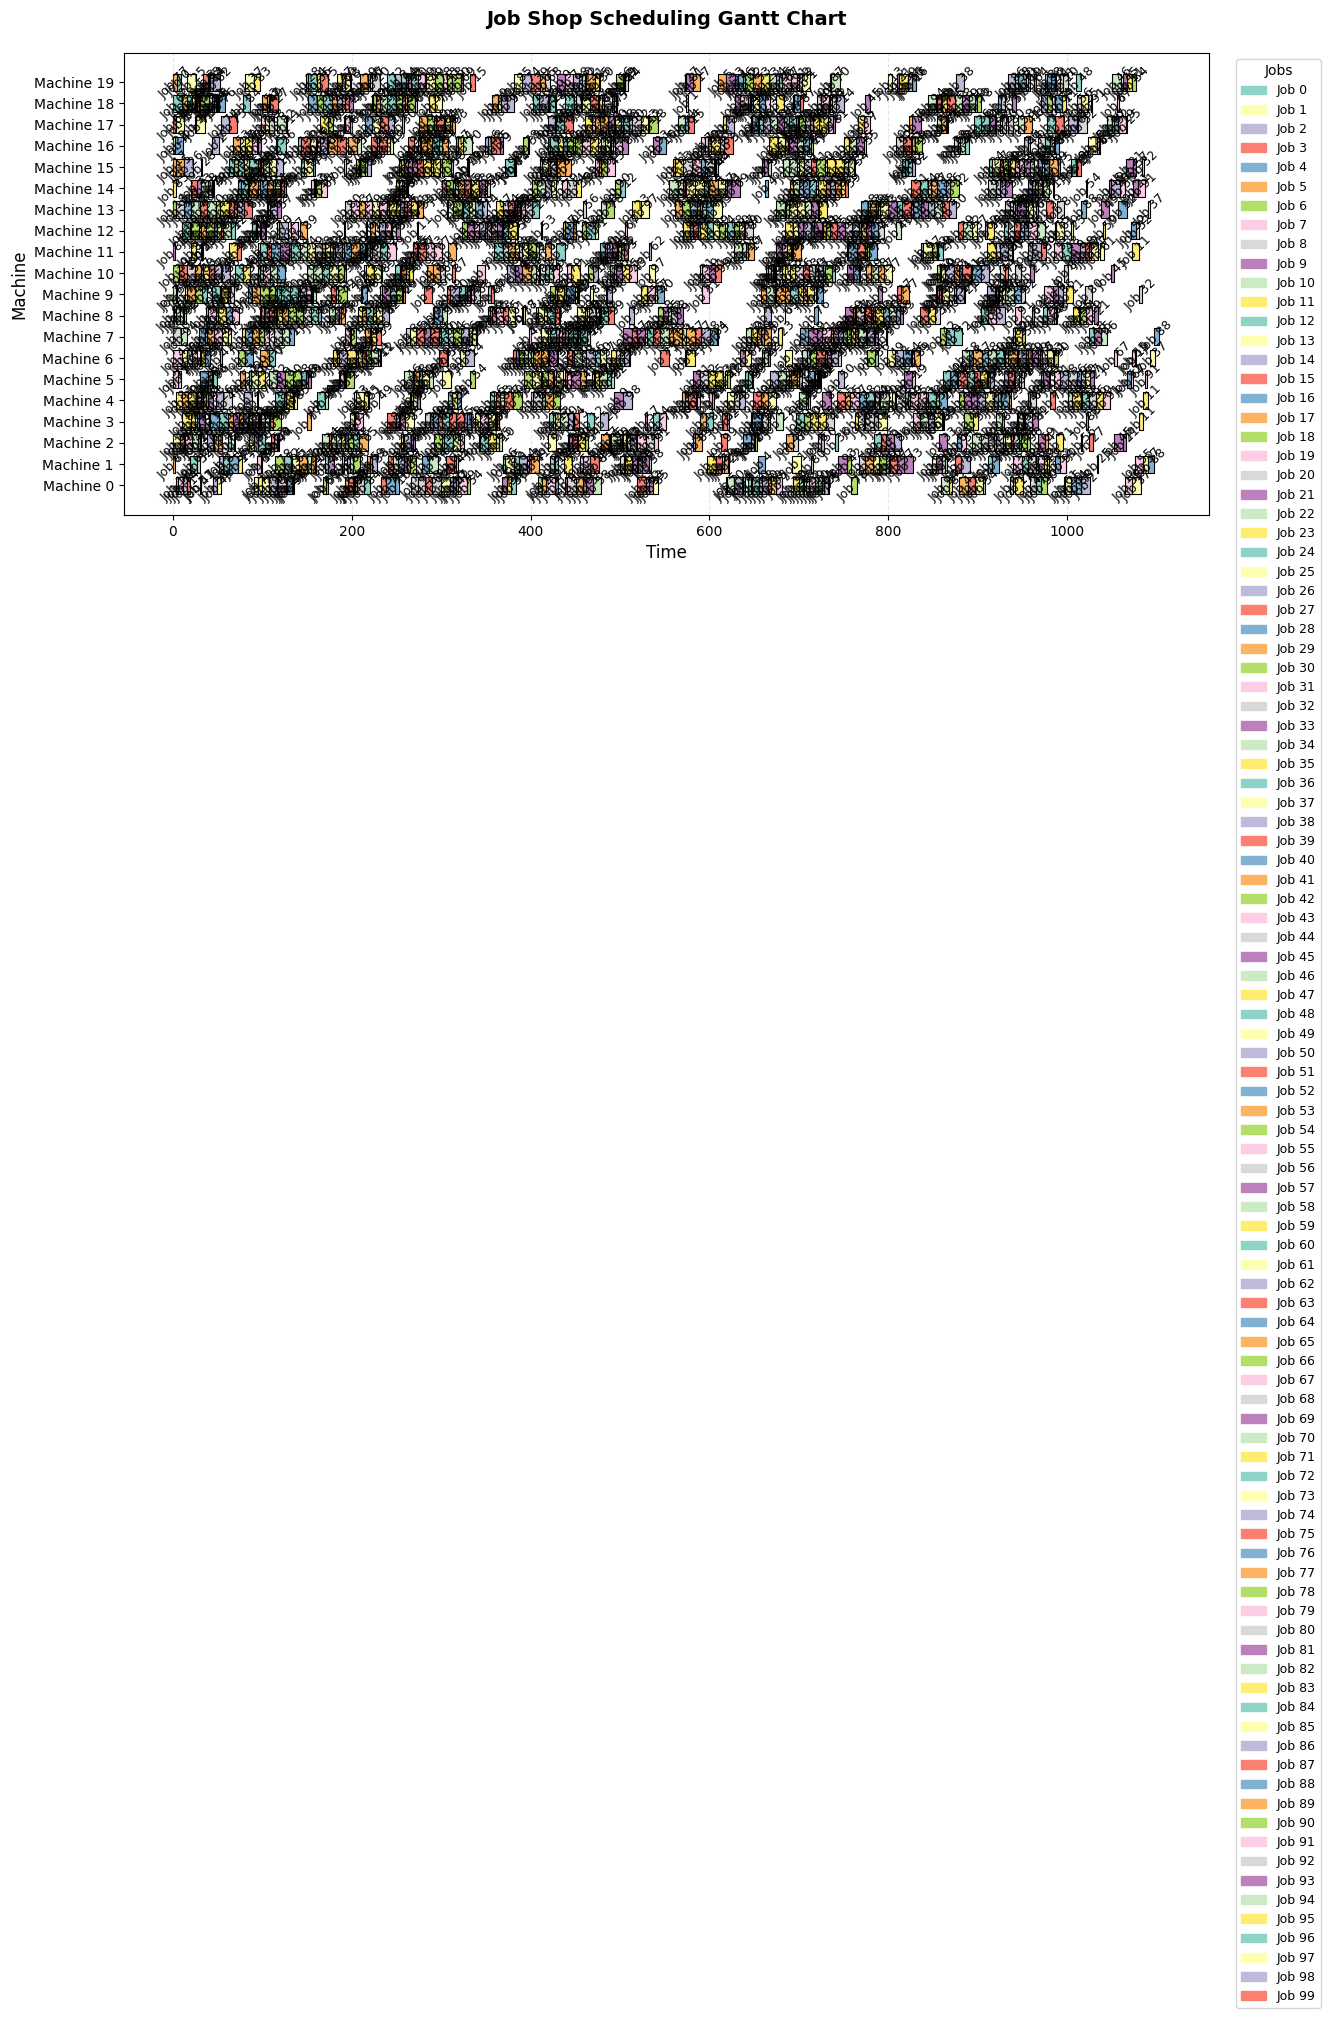

In [ ]:
train_and_visualize_jssp("ppo_jssp_100x20", "instances/jssp_100x20.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20       |
|    ep_rew_mean     | -56      |
| time/              |          |
|    fps             | 748      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19.3        |
|    ep_rew_mean          | -53.5       |
| time/                   |             |
|    fps                  | 573         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012186614 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.0146      |
|    learning_rate        | 0.

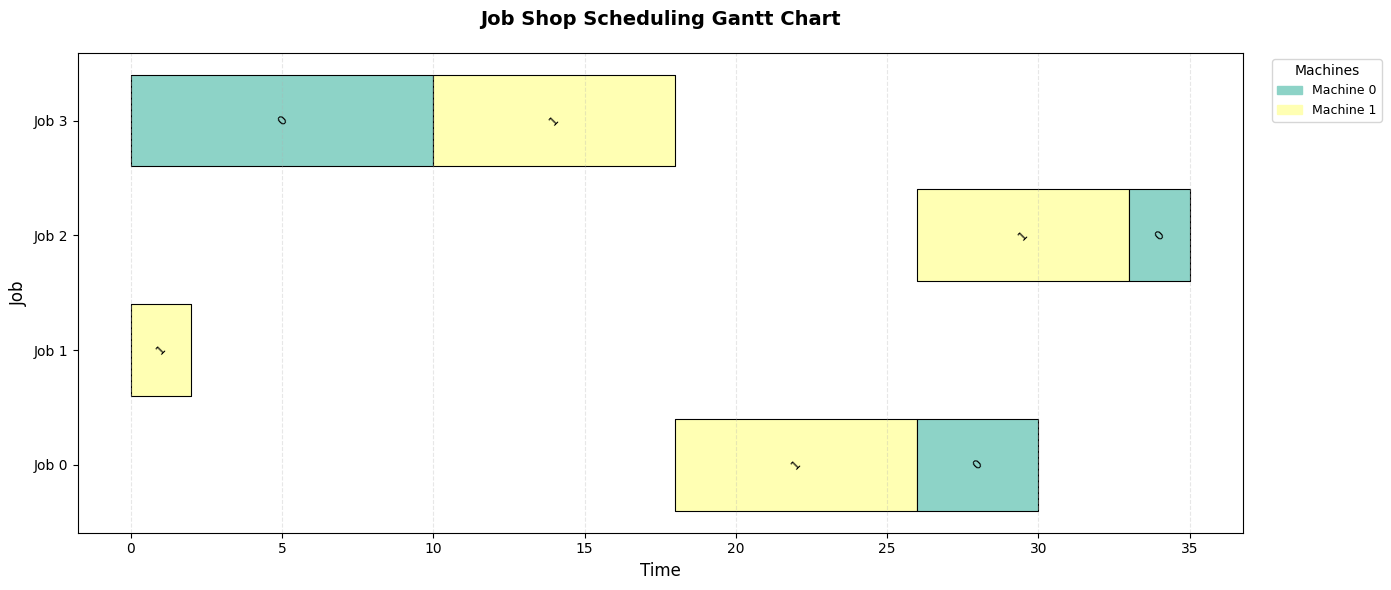

In [ ]:
train_and_visualize_jssp("ppo_jssp_5x2", "instances/jssp_5x2.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89.9     |
|    ep_rew_mean     | -175     |
| time/              |          |
|    fps             | 749      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 91.6        |
|    ep_rew_mean          | -178        |
| time/                   |             |
|    fps                  | 572         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008900297 |
|    clip_fraction        | 0.087       |
|    clip_range           | 0.2         |
|    entropy_loss  

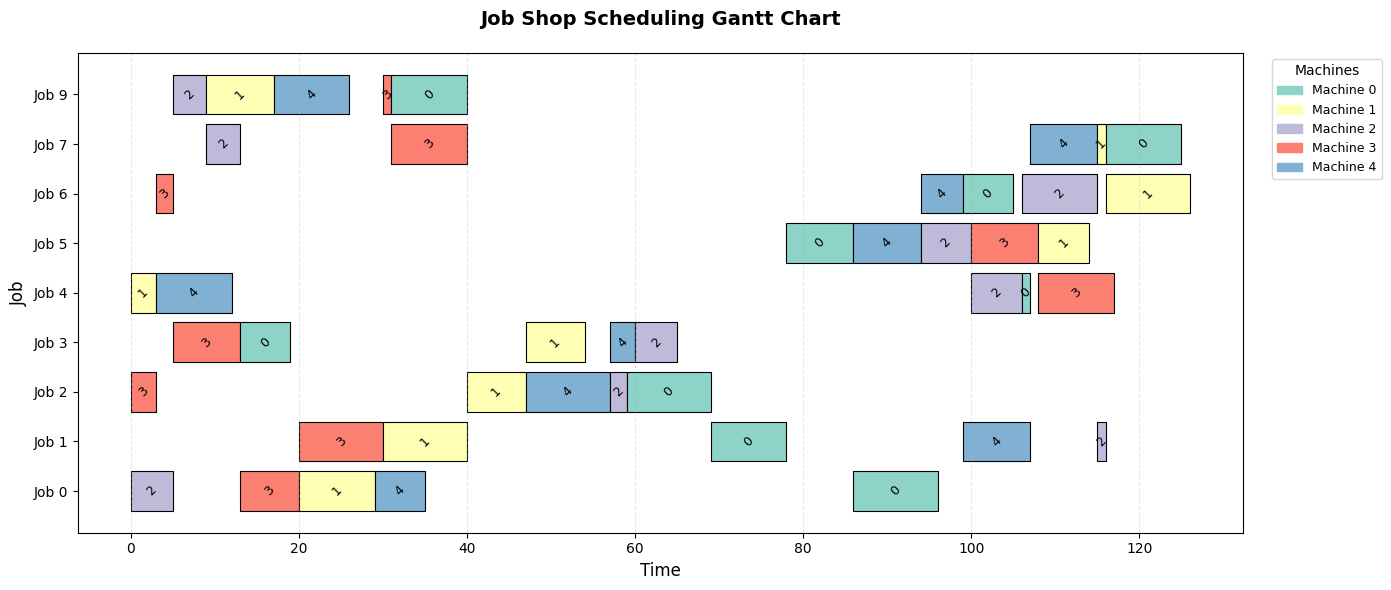

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create the environment
    env = JobShopEnv(env_config)

    # Train the model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    print(f"Model saved at: {model_path}")

    # Print job schedule content
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    # Calculate the makespan
    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    # Prepare data for visualization
    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    # Convert job schedule to DataFrame for plotting
    df = pd.DataFrame(job_schedule)

    # Sort jobs and assign numeric y positions (Job numbers instead of Machine numbers)
    job_order = sorted(df['Job'].unique(), key=lambda x: int(x.split()[-1]))
    job_ypos = {job: i * 10 for i, job in enumerate(job_order)}

    # Use a nicer color palette
    unique_machines = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    palette = sns.color_palette("Set3", n_colors=len(unique_machines))
    machine_colors = {machine: palette[i] for i, machine in enumerate(unique_machines)}

    # Create the Gantt chart plot
    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        job = row['Job']
        machine = row['Machine']
        ypos = job_ypos[job]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=machine_colors[machine],
            edgecolors='black',
            linewidth=0.8
        )

        # Add vertical text label inside bar (rotation 45 degrees)
        ax.text(
            start + duration / 2,
            ypos + 4,
            machine.split()[-1],
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    # Format axes: Y-axis to display job numbers
    ax.set_yticks([y + 4 for y in job_ypos.values()])
    ax.set_yticklabels(job_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Job", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)

    # Add light grid
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    # Add legend with machine numbers
    handles = [mpatches.Patch(color=color, label=machine) for machine, color in machine_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Machines", fontsize=9, title_fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

train_and_visualize_jssp("ppo_jssp_10x5", "instances/jssp_10x5.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 352      |
|    ep_rew_mean     | -417     |
| time/              |          |
|    fps             | 750      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 353        |
|    ep_rew_mean          | -421       |
| time/                   |            |
|    fps                  | 597        |
|    iterations           | 2          |
|    time_elapsed         | 6          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00982109 |
|    clip_fraction        | 0.0945     |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.99      |
|    explained_variance   | 0.00119    |
|    learning_rate        | 0.0003     |
|   

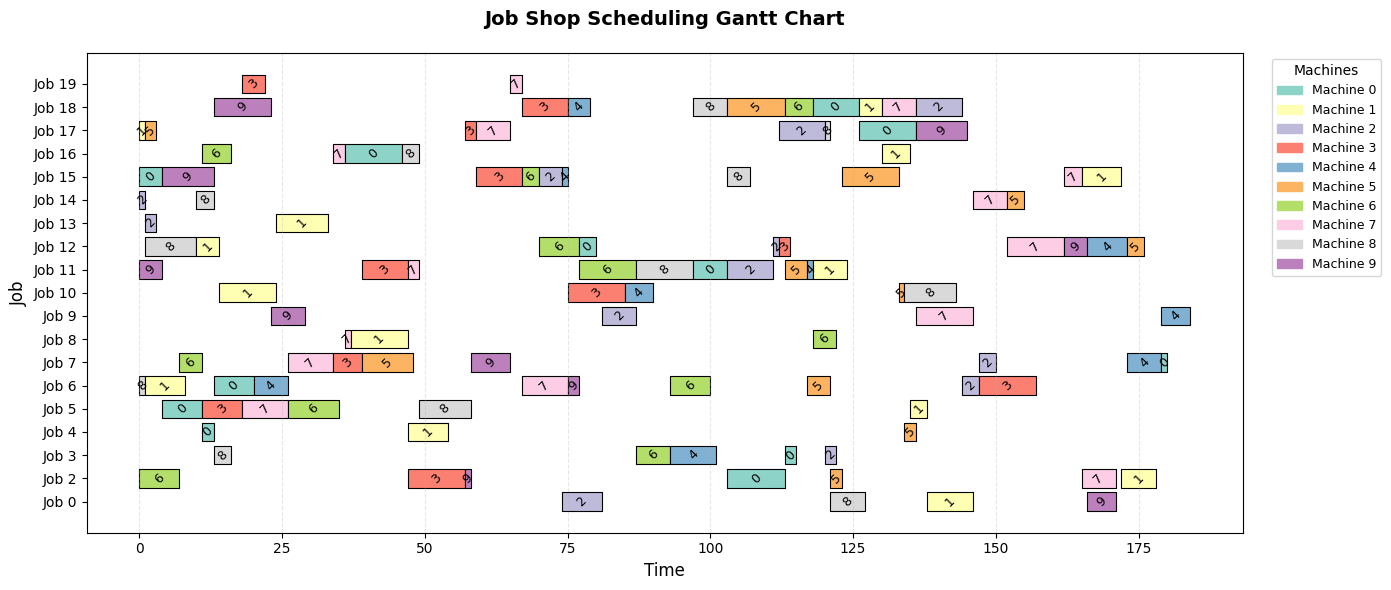

In [ ]:
train_and_visualize_jssp("ppo_jssp_20x10", "instances/jssp_20x10.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.12e+03 |
|    ep_rew_mean     | -943     |
| time/              |          |
|    fps             | 677      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.3e+03     |
|    ep_rew_mean          | -1.15e+03   |
| time/                   |             |
|    fps                  | 552         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012093063 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.9        |
|    explained_variance   | 0.00098     |
|    learning_rate        | 0.

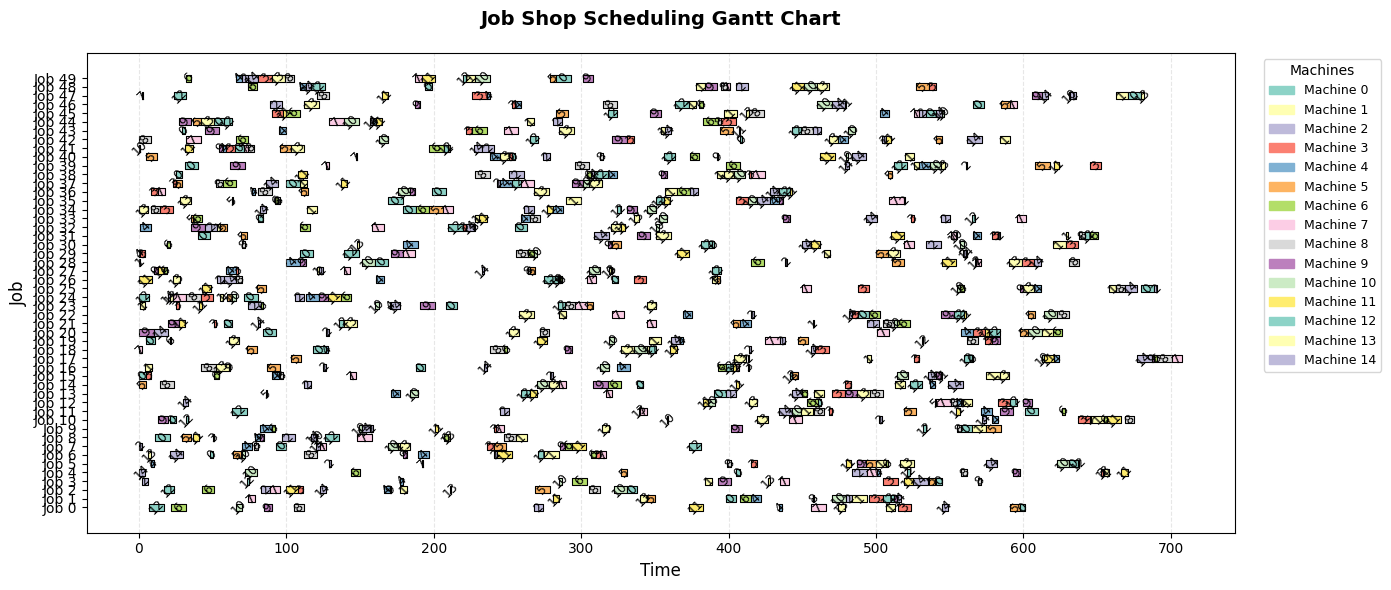

In [ ]:
train_and_visualize_jssp("ppo_jssp_50x15", "instances/jssp_50x15.json")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 619  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 3.34e+03    |
|    ep_rew_mean          | -2.45e+03   |
| time/                   |             |
|    fps                  | 544         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013731651 |
|    clip_fraction        | 0.154       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_variance   | 0.00194     |
|    learning_rate        | 0.0003      |
|    loss                 | 1.45        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.023

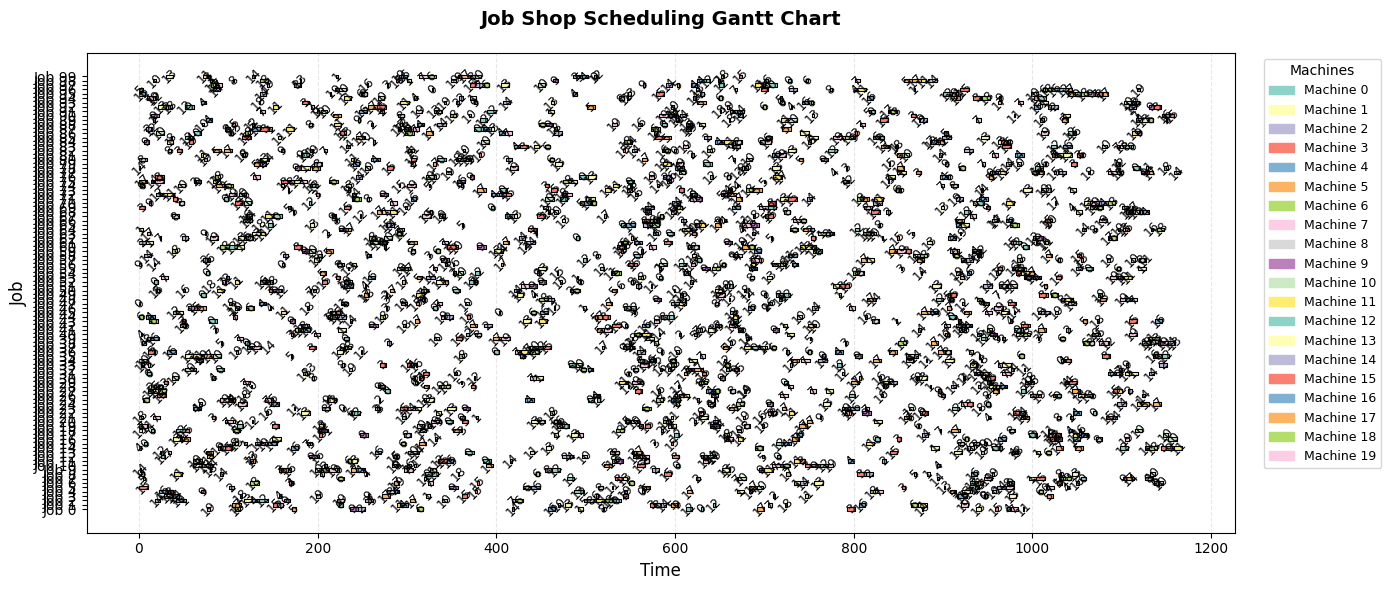

In [ ]:
train_and_visualize_jssp("ppo_jssp_100x20", "instances/jssp_100x20.json")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


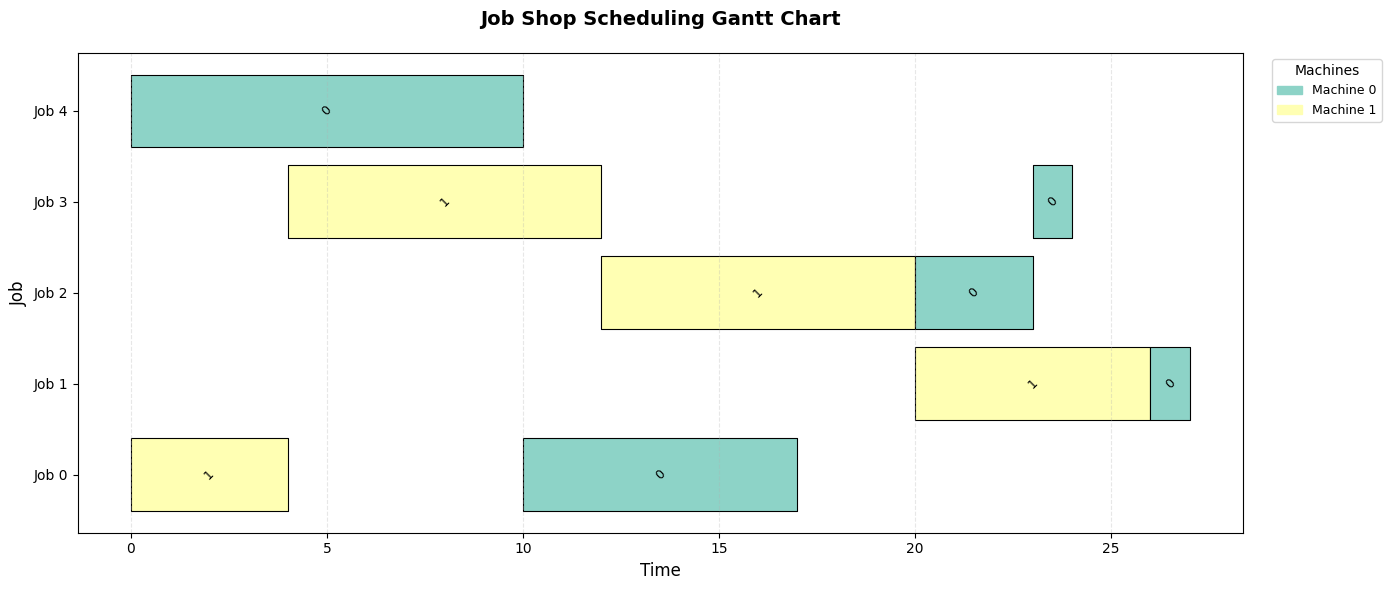

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import io
import sys
import re
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create environment
    env = JobShopEnv(env_config)

    # Capture stdout logs during training
    log_stream = io.StringIO()
    sys.stdout = log_stream

    # Train model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    # Restore stdout
    sys.stdout = sys.__stdout__
    print(f"Model saved at: {model_path}")

    # ------------------ PARSE TRAINING LOGS ------------------
    log_output = log_stream.getvalue()
    log_stream.close()

    log_blocks = log_output.split('-----------------------------------------')
    pattern = re.compile(r"\|\s*([\w/]+)\s*\|\s*([\-\deE.+]+)")

    data = []
    for block in log_blocks:
        record = {}
        for match in pattern.finditer(block):
            key, value = match.groups()
            try:
                record[key] = float(value)
            except ValueError:
                continue
        if record:
            data.append(record)

    df_log = pd.DataFrame(data)
    df_log = df_log.sort_values(by="total_timesteps")

    # ------------------ PLOT TRAINING METRICS ------------------
    metrics_to_plot = ["ep_rew_mean", "ep_len_mean", "value_loss", "policy_gradient_loss", "explained_variance"]

    plt.figure(figsize=(12, len(metrics_to_plot) * 2.5))
    for i, metric in enumerate(metrics_to_plot):
        if metric in df_log.columns:
            plt.subplot(len(metrics_to_plot), 1, i + 1)
            plt.plot(df_log["total_timesteps"], df_log[metric], label=metric, marker='o')
            plt.ylabel(metric)
            plt.grid(True)
            plt.legend()

    plt.xlabel("Total Timesteps")
    plt.suptitle("PPO Training Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ------------------ GANTT CHART ------------------
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    df = pd.DataFrame(job_schedule)
    job_order = sorted(df['Job'].unique(), key=lambda x: int(x.split()[-1]))
    job_ypos = {job: i * 10 for i, job in enumerate(job_order)}

    unique_machines = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    palette = sns.color_palette("Set3", n_colors=len(unique_machines))
    machine_colors = {machine: palette[i] for i, machine in enumerate(unique_machines)}

    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        job = row['Job']
        machine = row['Machine']
        ypos = job_ypos[job]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=machine_colors[machine],
            edgecolors='black',
            linewidth=0.8
        )

        ax.text(
            start + duration / 2,
            ypos + 4,
            machine.split()[-1],
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    ax.set_yticks([y + 4 for y in job_ypos.values()])
    ax.set_yticklabels(job_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Job", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    handles = [mpatches.Patch(color=color, label=machine) for machine, color in machine_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Machines", fontsize=9, title_fontsize=10)

    plt.tight_layout()
    plt.show()

# Run training and visualization
train_and_visualize_jssp("ppo_jssp_5x2", "instances/jssp_5x2.json")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


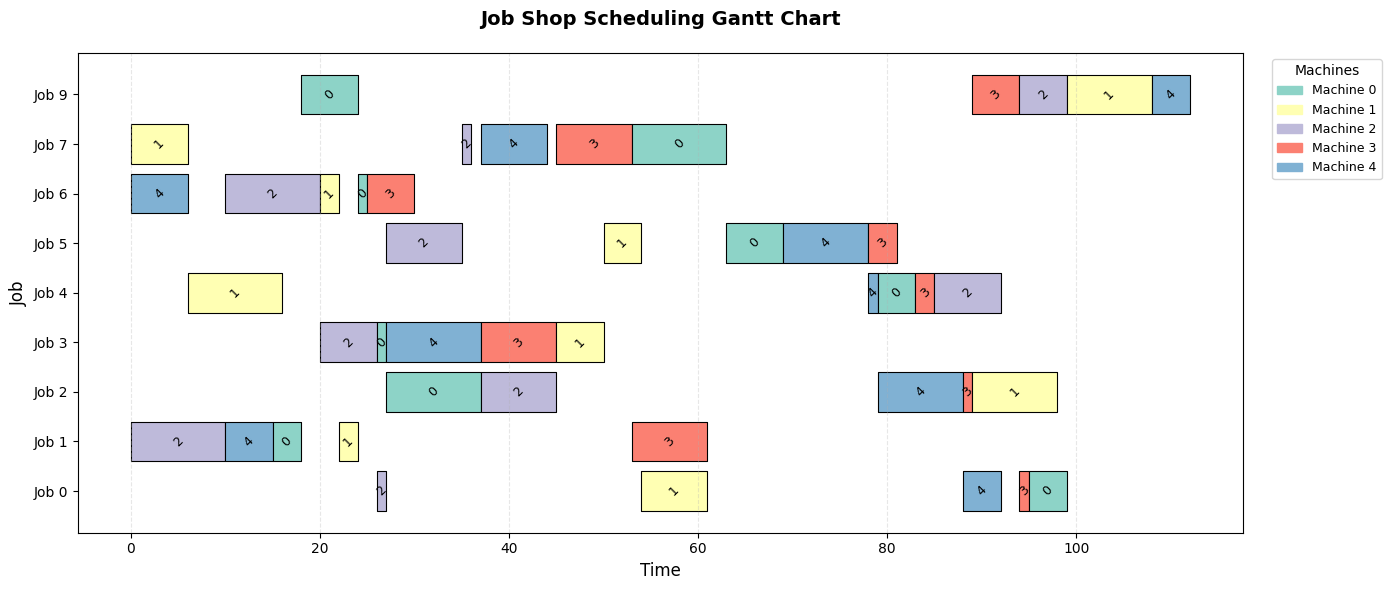

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import io
import sys
import re
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create environment
    env = JobShopEnv(env_config)

    # Capture stdout logs during training
    log_stream = io.StringIO()
    sys.stdout = log_stream

    # Train model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    # Restore stdout
    sys.stdout = sys.__stdout__
    print(f"Model saved at: {model_path}")

    # ------------------ PARSE TRAINING LOGS ------------------
    log_output = log_stream.getvalue()
    log_stream.close()

    log_blocks = log_output.split('-----------------------------------------')
    pattern = re.compile(r"\|\s*([\w/]+)\s*\|\s*([\-\deE.+]+)")

    data = []
    for block in log_blocks:
        record = {}
        for match in pattern.finditer(block):
            key, value = match.groups()
            try:
                record[key] = float(value)
            except ValueError:
                continue
        if record:
            data.append(record)

    df_log = pd.DataFrame(data)
    df_log = df_log.sort_values(by="total_timesteps")

    # ------------------ PLOT TRAINING METRICS ------------------
    metrics_to_plot = ["ep_rew_mean", "ep_len_mean", "value_loss", "policy_gradient_loss", "explained_variance"]

    plt.figure(figsize=(12, len(metrics_to_plot) * 2.5))
    for i, metric in enumerate(metrics_to_plot):
        if metric in df_log.columns:
            plt.subplot(len(metrics_to_plot), 1, i + 1)
            plt.plot(df_log["total_timesteps"], df_log[metric], label=metric, marker='o')
            plt.ylabel(metric)
            plt.grid(True)
            plt.legend()

    plt.xlabel("Total Timesteps")
    plt.suptitle("PPO Training Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ------------------ GANTT CHART ------------------
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    df = pd.DataFrame(job_schedule)
    job_order = sorted(df['Job'].unique(), key=lambda x: int(x.split()[-1]))
    job_ypos = {job: i * 10 for i, job in enumerate(job_order)}

    unique_machines = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    palette = sns.color_palette("Set3", n_colors=len(unique_machines))
    machine_colors = {machine: palette[i] for i, machine in enumerate(unique_machines)}

    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        job = row['Job']
        machine = row['Machine']
        ypos = job_ypos[job]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=machine_colors[machine],
            edgecolors='black',
            linewidth=0.8
        )

        ax.text(
            start + duration / 2,
            ypos + 4,
            machine.split()[-1],
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    ax.set_yticks([y + 4 for y in job_ypos.values()])
    ax.set_yticklabels(job_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Job", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    handles = [mpatches.Patch(color=color, label=machine) for machine, color in machine_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Machines", fontsize=9, title_fontsize=10)

    plt.tight_layout()
    plt.show()

# Run training and visualization
train_and_visualize_jssp("ppo_jssp_10x5", "instances/jssp_10x5.json")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


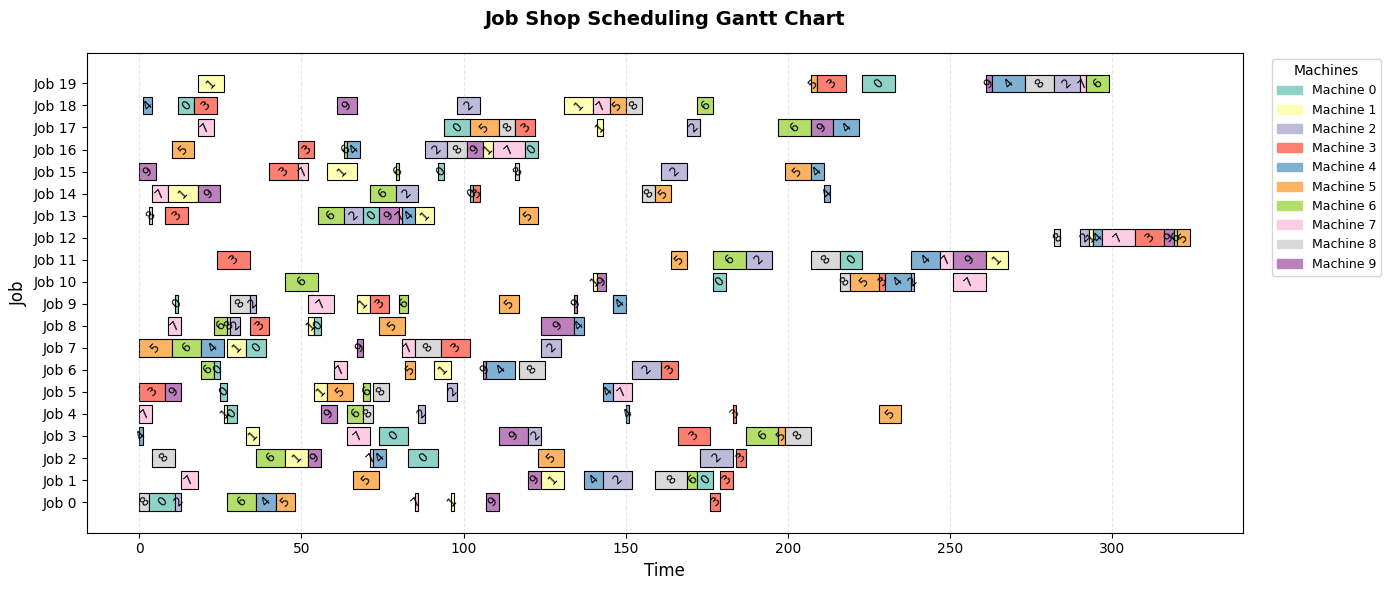

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import io
import sys
import re
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create environment
    env = JobShopEnv(env_config)

    # Capture stdout logs during training
    log_stream = io.StringIO()
    sys.stdout = log_stream

    # Train model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    # Restore stdout
    sys.stdout = sys.__stdout__
    print(f"Model saved at: {model_path}")

    # ------------------ PARSE TRAINING LOGS ------------------
    log_output = log_stream.getvalue()
    log_stream.close()

    log_blocks = log_output.split('-----------------------------------------')
    pattern = re.compile(r"\|\s*([\w/]+)\s*\|\s*([\-\deE.+]+)")

    data = []
    for block in log_blocks:
        record = {}
        for match in pattern.finditer(block):
            key, value = match.groups()
            try:
                record[key] = float(value)
            except ValueError:
                continue
        if record:
            data.append(record)

    df_log = pd.DataFrame(data)
    df_log = df_log.sort_values(by="total_timesteps")

    # ------------------ PLOT TRAINING METRICS ------------------
    metrics_to_plot = ["ep_rew_mean", "ep_len_mean", "value_loss", "policy_gradient_loss", "explained_variance"]

    plt.figure(figsize=(12, len(metrics_to_plot) * 2.5))
    for i, metric in enumerate(metrics_to_plot):
        if metric in df_log.columns:
            plt.subplot(len(metrics_to_plot), 1, i + 1)
            plt.plot(df_log["total_timesteps"], df_log[metric], label=metric, marker='o')
            plt.ylabel(metric)
            plt.grid(True)
            plt.legend()

    plt.xlabel("Total Timesteps")
    plt.suptitle("PPO Training Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ------------------ GANTT CHART ------------------
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    df = pd.DataFrame(job_schedule)
    job_order = sorted(df['Job'].unique(), key=lambda x: int(x.split()[-1]))
    job_ypos = {job: i * 10 for i, job in enumerate(job_order)}

    unique_machines = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    palette = sns.color_palette("Set3", n_colors=len(unique_machines))
    machine_colors = {machine: palette[i] for i, machine in enumerate(unique_machines)}

    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        job = row['Job']
        machine = row['Machine']
        ypos = job_ypos[job]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=machine_colors[machine],
            edgecolors='black',
            linewidth=0.8
        )

        ax.text(
            start + duration / 2,
            ypos + 4,
            machine.split()[-1],
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    ax.set_yticks([y + 4 for y in job_ypos.values()])
    ax.set_yticklabels(job_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Job", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    handles = [mpatches.Patch(color=color, label=machine) for machine, color in machine_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Machines", fontsize=9, title_fontsize=10)

    plt.tight_layout()
    plt.show()

# Run training and visualization
train_and_visualize_jssp("ppo_jssp_20x10", "instances/jssp_20x10.json")

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import io
import sys
import re
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create environment
    env = JobShopEnv(env_config)

    # Capture stdout logs during training
    log_stream = io.StringIO()
    sys.stdout = log_stream

    # Train model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    # Restore stdout
    sys.stdout = sys.__stdout__
    print(f"Model saved at: {model_path}")

    # ------------------ PARSE TRAINING LOGS ------------------
    log_output = log_stream.getvalue()
    log_stream.close()

    log_blocks = log_output.split('-----------------------------------------')
    pattern = re.compile(r"\|\s*([\w/]+)\s*\|\s*([\-\deE.+]+)")

    data = []
    for block in log_blocks:
        record = {}
        for match in pattern.finditer(block):
            key, value = match.groups()
            try:
                record[key] = float(value)
            except ValueError:
                continue
        if record:
            data.append(record)

    df_log = pd.DataFrame(data)
    df_log = df_log.sort_values(by="total_timesteps")

    # ------------------ PLOT TRAINING METRICS ------------------
    metrics_to_plot = ["ep_rew_mean", "ep_len_mean", "value_loss", "policy_gradient_loss", "explained_variance"]

    plt.figure(figsize=(12, len(metrics_to_plot) * 2.5))
    for i, metric in enumerate(metrics_to_plot):
        if metric in df_log.columns:
            plt.subplot(len(metrics_to_plot), 1, i + 1)
            plt.plot(df_log["total_timesteps"], df_log[metric], label=metric, marker='o')
            plt.ylabel(metric)
            plt.grid(True)
            plt.legend()

    plt.xlabel("Total Timesteps")
    plt.suptitle("PPO Training Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ------------------ GANTT CHART ------------------
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    df = pd.DataFrame(job_schedule)
    job_order = sorted(df['Job'].unique(), key=lambda x: int(x.split()[-1]))
    job_ypos = {job: i * 10 for i, job in enumerate(job_order)}

    unique_machines = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    palette = sns.color_palette("Set3", n_colors=len(unique_machines))
    machine_colors = {machine: palette[i] for i, machine in enumerate(unique_machines)}

    fig, ax = plt.subplots(figsize=(14, 6))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        job = row['Job']
        machine = row['Machine']
        ypos = job_ypos[job]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=machine_colors[machine],
            edgecolors='black',
            linewidth=0.8
        )

        ax.text(
            start + duration / 2,
            ypos + 4,
            machine.split()[-1],
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            rotation=45
        )

    ax.set_yticks([y + 4 for y in job_ypos.values()])
    ax.set_yticklabels(job_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Job", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    handles = [mpatches.Patch(color=color, label=machine) for machine, color in machine_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Machines", fontsize=9, title_fontsize=10)

    plt.tight_layout()
    plt.show()

# Run training and visualization
train_and_visualize_jssp("ppo_jssp_50x15", "instances/jssp_50x15.json")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


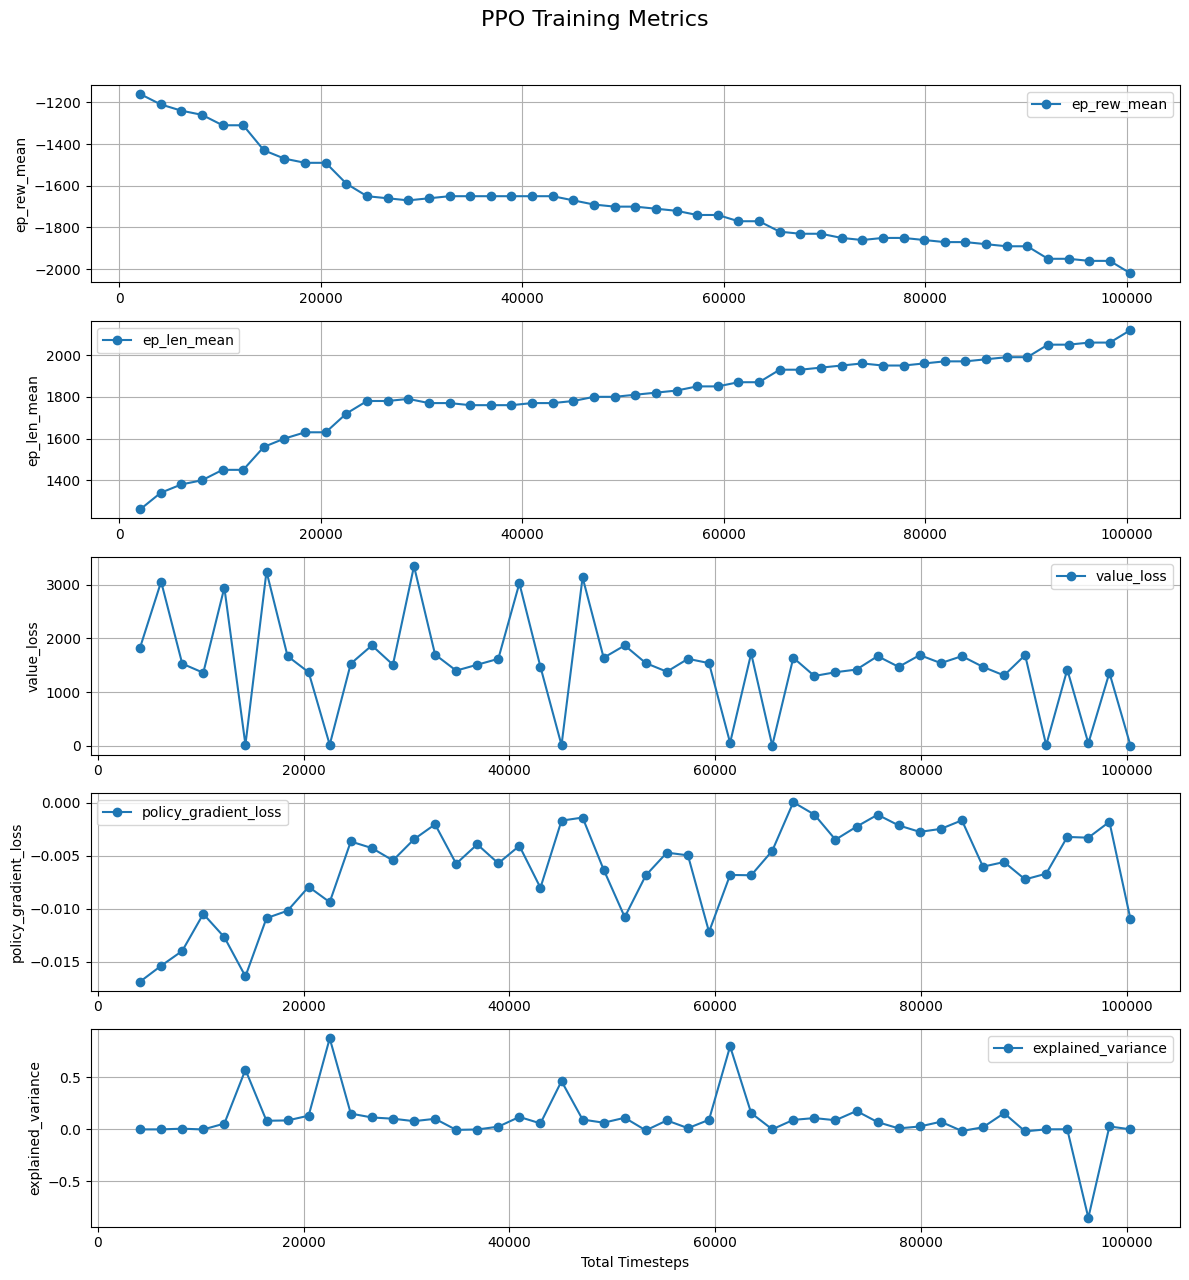

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import io
import sys
import re
from stable_baselines3 import PPO
from jobshop_env_new import JobShopEnv

def train_and_visualize_jssp(model_path, env_config, total_timesteps=100_000, device="cuda"):
    # Create environment
    env = JobShopEnv(env_config)

    # Capture stdout logs during training
    log_stream = io.StringIO()
    sys.stdout = log_stream

    # Train model
    model = PPO("MlpPolicy", env, verbose=1, device=device)
    model.learn(total_timesteps=total_timesteps)
    model.save(model_path)

    # Restore stdout
    sys.stdout = sys.__stdout__
    print(f"Model saved at: {model_path}")

    # ------------------ PARSE TRAINING LOGS ------------------
    log_output = log_stream.getvalue()
    log_stream.close()

    log_blocks = log_output.split('-----------------------------------------')
    pattern = re.compile(r"\|\s*([\w/]+)\s*\|\s*([\-\deE.+]+)")

    data = []
    for block in log_blocks:
        record = {}
        for match in pattern.finditer(block):
            key, value = match.groups()
            try:
                record[key] = float(value)
            except ValueError:
                continue
        if record:
            data.append(record)

    df_log = pd.DataFrame(data)
    df_log = df_log.sort_values(by="total_timesteps")

    # ------------------ PLOT TRAINING METRICS ------------------
    metrics_to_plot = ["ep_rew_mean", "ep_len_mean", "value_loss", "policy_gradient_loss", "explained_variance"]

    plt.figure(figsize=(12, len(metrics_to_plot) * 2.5))
    for i, metric in enumerate(metrics_to_plot):
        if metric in df_log.columns:
            plt.subplot(len(metrics_to_plot), 1, i + 1)
            plt.plot(df_log["total_timesteps"], df_log[metric], label=metric, marker='o')
            plt.ylabel(metric)
            plt.grid(True)
            plt.legend()

    plt.xlabel("Total Timesteps")
    plt.suptitle("PPO Training Metrics", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ------------------ GANTT CHART ------------------
    print("Job Schedule Content:")
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

    makespan = max([task['Finish'] for tasks in env.job_schedule.values() for task in tasks])
    print(f"Final Makespan: {makespan}")

    job_schedule = []
    for job_id, tasks in env.job_schedule.items():
        for task in tasks:
            job_schedule.append({
                'Job': f"Job {job_id}",
                'Machine': f"Machine {task['Machine']}",
                'Start': task['Start'],
                'Finish': task['Finish']
            })

    df = pd.DataFrame(job_schedule)
    job_order = sorted(df['Job'].unique(), key=lambda x: int(x.split()[-1]))
    job_ypos = {job: i * 10 for i, job in enumerate(job_order)}

    unique_machines = sorted(df['Machine'].unique(), key=lambda x: int(x.split()[-1]))
    palette = sns.color_palette("Set3", n_colors=len(unique_machines))
    machine_colors = {machine: palette[i] for i, machine in enumerate(unique_machines)}

    fig, ax = plt.subplots(figsize=(14, 14))

    for _, row in df.iterrows():
        start = row['Start']
        duration = row['Finish'] - row['Start']
        job = row['Job']
        machine = row['Machine']
        ypos = job_ypos[job]

        ax.broken_barh(
            [(start, duration)],
            (ypos, 8),
            facecolors=machine_colors[machine],
            edgecolors='black',
            linewidth=0.8
        )

    ax.set_yticks([y + 4 for y in job_ypos.values()])
    ax.set_yticklabels(job_order, fontsize=10)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("Job", fontsize=12)
    ax.set_title("Job Shop Scheduling Gantt Chart", fontsize=14, weight='bold', pad=20)
    ax.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)

    handles = [mpatches.Patch(color=color, label=machine) for machine, color in machine_colors.items()]
    ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left', title="Machines", fontsize=9, title_fontsize=10)

    plt.tight_layout()
    plt.show()

# Run training and visualization
train_and_visualize_jssp("ppo_jssp_50x15", "instances/jssp_50x15.json")

In [ ]:
test_env = JobShopEnv("instances/jssp_5x2.json")
obs = test_env.reset()
done = False

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _ = test_env.step(action)

print("Final Makespan Reward:", reward)
test_env.render_gantt_numerical()


Final Makespan Reward: -15


In [ ]:
print("Job Schedule Content:")
for job_id, tasks in env.job_schedule.items():
    for task in tasks:
        print(f"Job {job_id}, Machine {task['Machine']}, Start {task['Start']}, Finish {task['Finish']}")

Job Schedule Content:
Job 0, Machine 0, Start 6, Finish 9
Job 1, Machine 1, Start 0, Finish 2
Job 1, Machine 0, Start 9, Finish 13
Job 2, Machine 0, Start 2, Finish 6
Job 3, Machine 1, Start 7, Finish 10
Job 4, Machine 0, Start 0, Finish 2
Job 4, Machine 1, Start 2, Finish 7
